In [308]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [309]:
# Читаем данные, которые будем использовать.
cars= pd.read_csv("statistics.csv")

In [310]:
# Проверяем первые 5 значений нашего набора данных 
cars.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"£79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"


In [311]:
# Перечисление всех названий столбцов.
print(cars.columns.tolist())

['Name', 'Subtitle', 'Acceleration', 'TopSpeed', 'Range', 'Efficiency', 'FastChargeSpeed', 'Drive', 'NumberofSeats', 'PriceinGermany', 'PriceinUK']


In [312]:
#заполнение пустых данных 0

cars=cars.fillna('0')

In [313]:
cars['Manufacturer'] = cars.Name.str.split(' ', 1, expand=True)[0]

In [314]:
PriceinGermany=[]
for i in cars['PriceinGermany']:
    PriceinGermany+=[int(i.replace('€','').replace(',',''))]
cars['PriceinGermany']=PriceinGermany

In [315]:
FastChargeSpeed=[]
for i in cars['FastChargeSpeed']:
    FastChargeSpeed+=[int(i.replace(' km/h','').replace('-','0'))]
cars['FastChargeSpeed']=FastChargeSpeed

In [316]:
Efficiency=[]
for i in cars['Efficiency']:
    Efficiency+=[int(i.replace(' Wh/km',''))]
cars['Efficiency']=Efficiency

In [317]:
Range=[]
for i in cars['Range']:
    Range+=[int(i.replace(' km',''))]
cars['Range']=Range

In [318]:
TopSpeed=[]
for i in cars['TopSpeed']:
    TopSpeed+=[int(i.replace(' km/h',''))]
cars['TopSpeed']=TopSpeed

In [319]:
Acceleration=[]
for i in cars['Acceleration']:
    Acceleration+=[float(i.replace(' sec',''))]
cars['Acceleration']=Acceleration

In [320]:
Subtitle=[]
for i in cars['Subtitle']:
    Subtitle+=[float(i.replace('Battery Electric Vehicle | ','').replace(' kWh','').replace('      ',''))]
cars['Subtitle']=Subtitle

In [321]:
cars = cars.rename(columns = {'Subtitle':'KWH'})

In [322]:
# Проверяем первые 5 значений нашего набора данных 
cars.head()

,Name,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,0,Opel
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,"£31,680",Renault
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,"£25,995",Nissan
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,"£79,900",Audi
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,"£138,830",Porsche


In [323]:
# Наблюдаем за нашими столбцами и типами данных.
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             180 non-null    object 
 1   KWH              180 non-null    float64
 2   Acceleration     180 non-null    float64
 3   TopSpeed         180 non-null    int64  
 4   Range            180 non-null    int64  
 5   Efficiency       180 non-null    int64  
 6   FastChargeSpeed  180 non-null    int64  
 7   Drive            180 non-null    object 
 8   NumberofSeats    180 non-null    int64  
 9   PriceinGermany   180 non-null    int64  
 10  PriceinUK        180 non-null    object 
 11  Manufacturer     180 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 17.0+ KB


In [324]:
cars.corr()

,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,NumberofSeats,PriceinGermany
KWH,1.000000,-0.622985,0.691415,0.890092,0.356426,0.659743,0.134447,0.598084
Acceleration,-0.622985,1.000000,-0.821041,-0.712077,0.140984,-0.741670,0.318302,-0.501519
TopSpeed,0.691415,-0.821041,1.000000,0.760319,-0.047383,0.773190,-0.242567,0.678865
Range,0.890092,-0.712077,0.760319,1.000000,-0.072273,0.767574,-0.068851,0.569037
Efficiency,0.356426,0.140984,-0.047383,-0.072273,1.000000,-0.059914,0.602469,0.239221
FastChargeSpeed,0.659743,-0.741670,0.773190,0.767574,-0.059914,1.000000,-0.119644,0.595609
NumberofSeats,0.134447,0.318302,-0.242567,-0.068851,0.602469,-0.119644,1.000000,-0.012455
PriceinGermany,0.598084,-0.501519,0.678865,0.569037,0.239221,0.595609,-0.012455,1.000000


<AxesSubplot:>

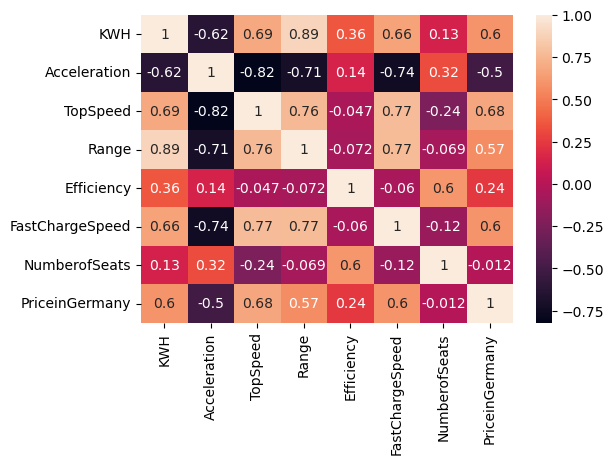

In [325]:
plt.figure(figsize=(6,4))
sns.heatmap(cars.corr(), annot=True)

<AxesSubplot:xlabel='Drive', ylabel='count'>

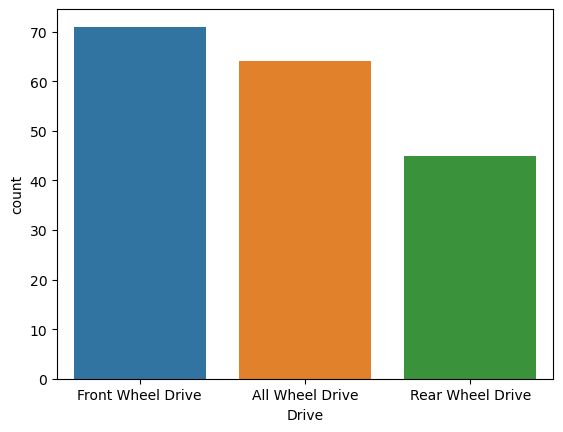

In [326]:
sns.countplot(x = 'Drive', data = df)

<AxesSubplot:xlabel='NumberofSeats', ylabel='count'>

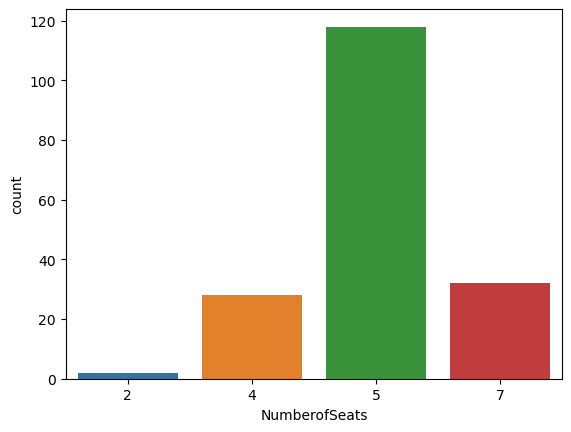

In [327]:
sns.countplot(x = 'NumberofSeats', data = df)

<AxesSubplot:xlabel='NumberofSeats', ylabel='count'>

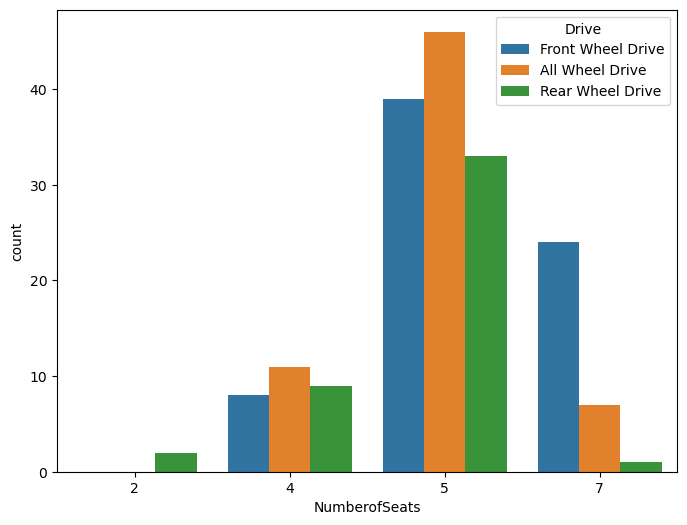

In [328]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'NumberofSeats', hue='Drive', data=df)

<AxesSubplot:xlabel='count', ylabel='Manufacturer'>

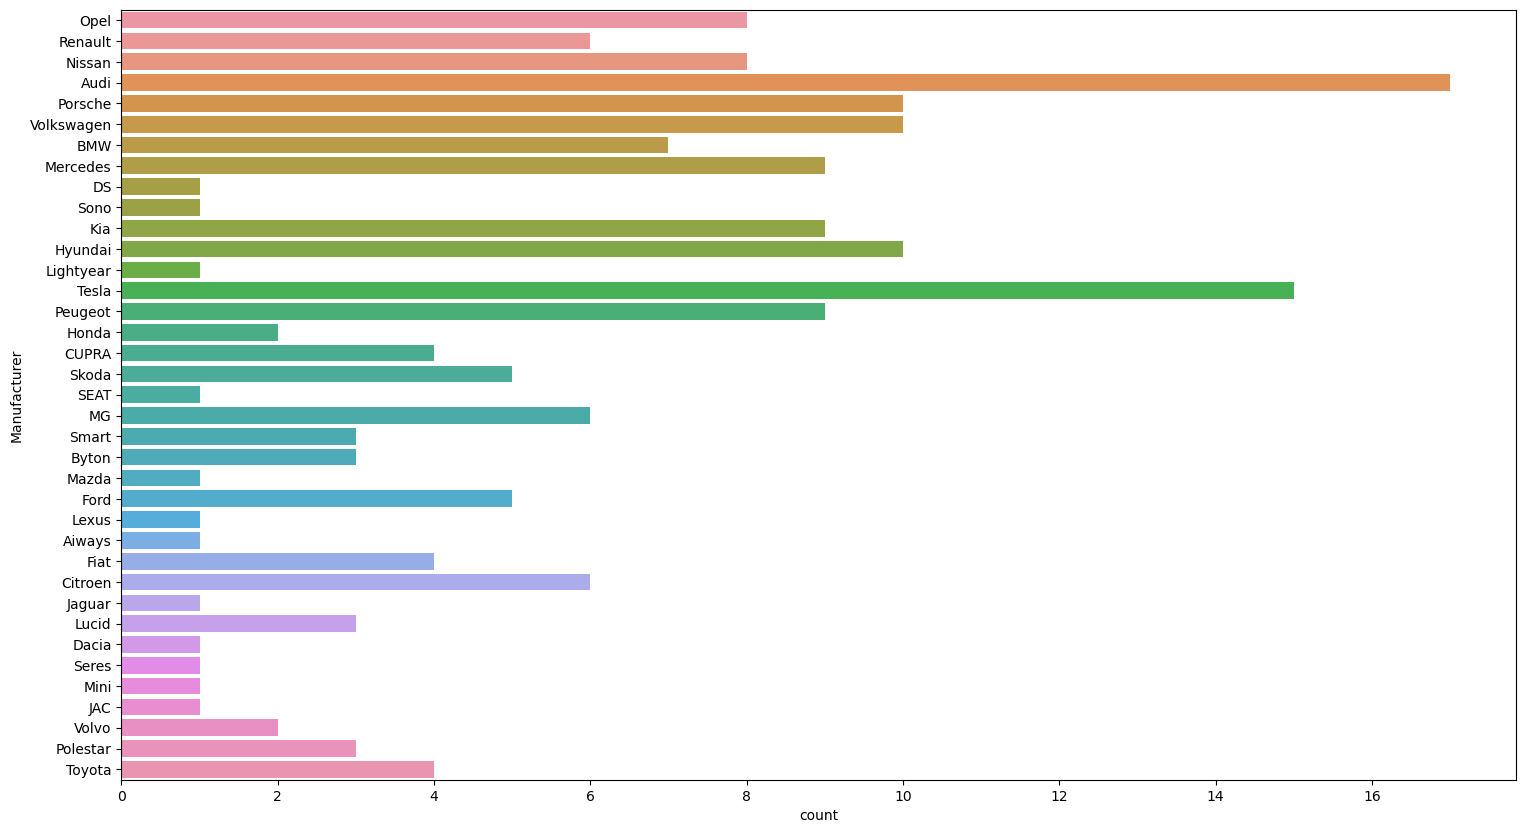

In [354]:
plt.figure(figsize=(18,10))
sns.countplot(y = 'Manufacturer', data = df)

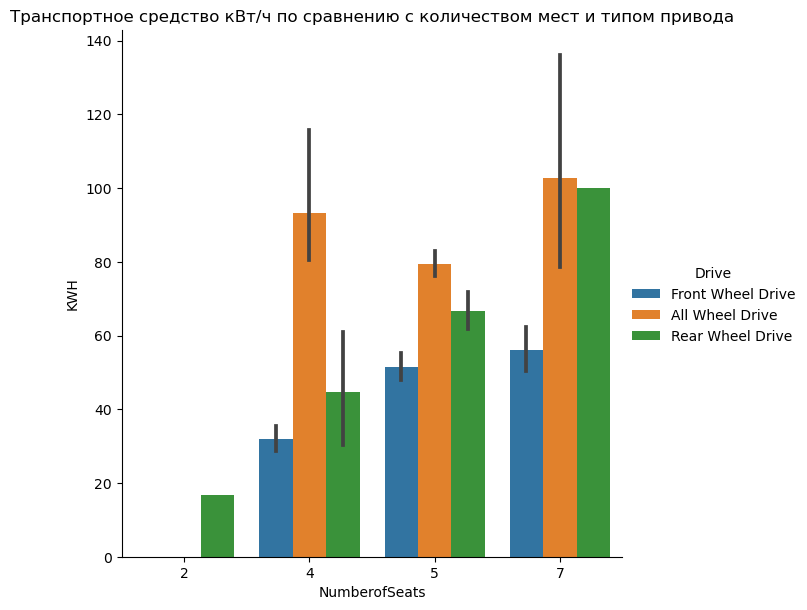

In [352]:
sns.catplot(data=df, kind="bar", x="NumberofSeats", y="KWH",height=6, hue="Drive")
plt.title("Транспортное средство кВт/ч по сравнению с количеством мест и типом привода")
plt.show()

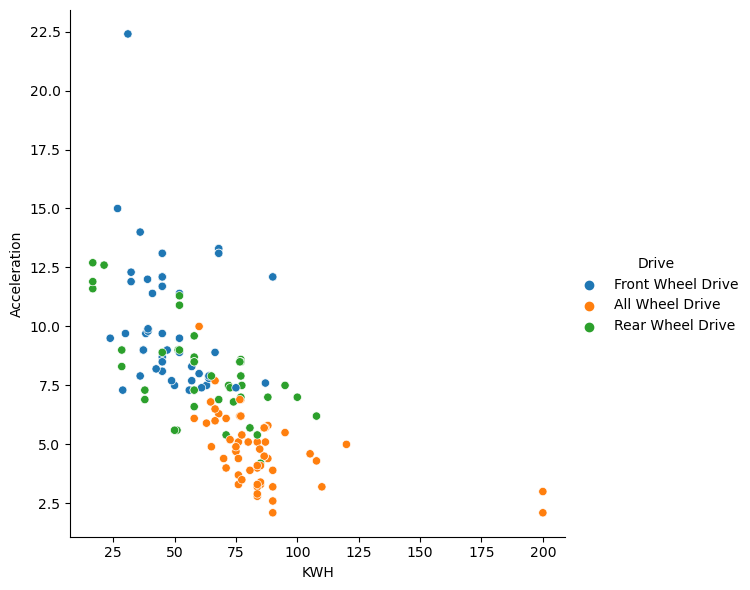

In [331]:
sns.relplot(x="KWH", y="Acceleration", height=6,hue="Drive",data=df)

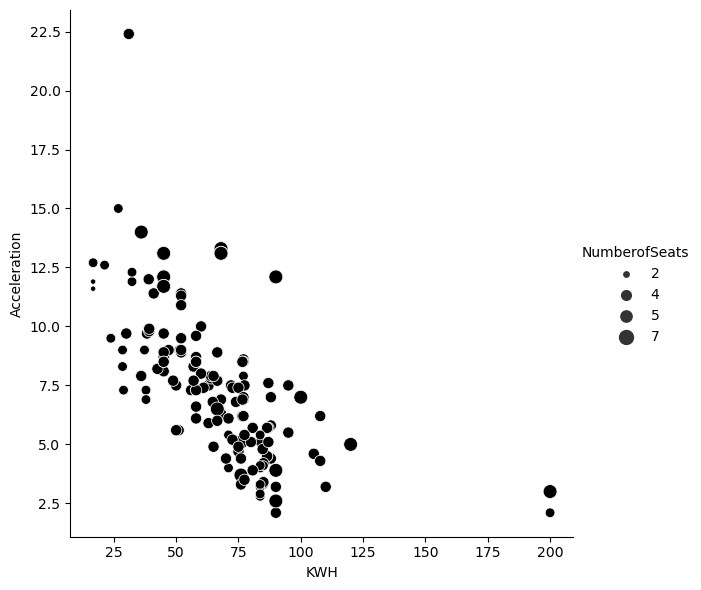

In [351]:
sns.relplot(x="KWH", y="Acceleration", size="NumberofSeats", height=6,sizes=(15, 100),data=df, color="black")

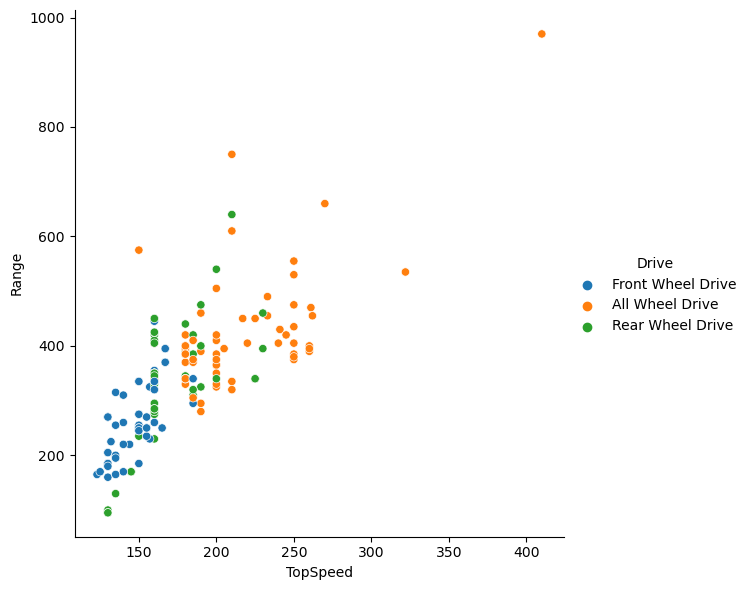

In [333]:
sns.relplot(x="TopSpeed", y="Range",height=6, hue="Drive",data=df)

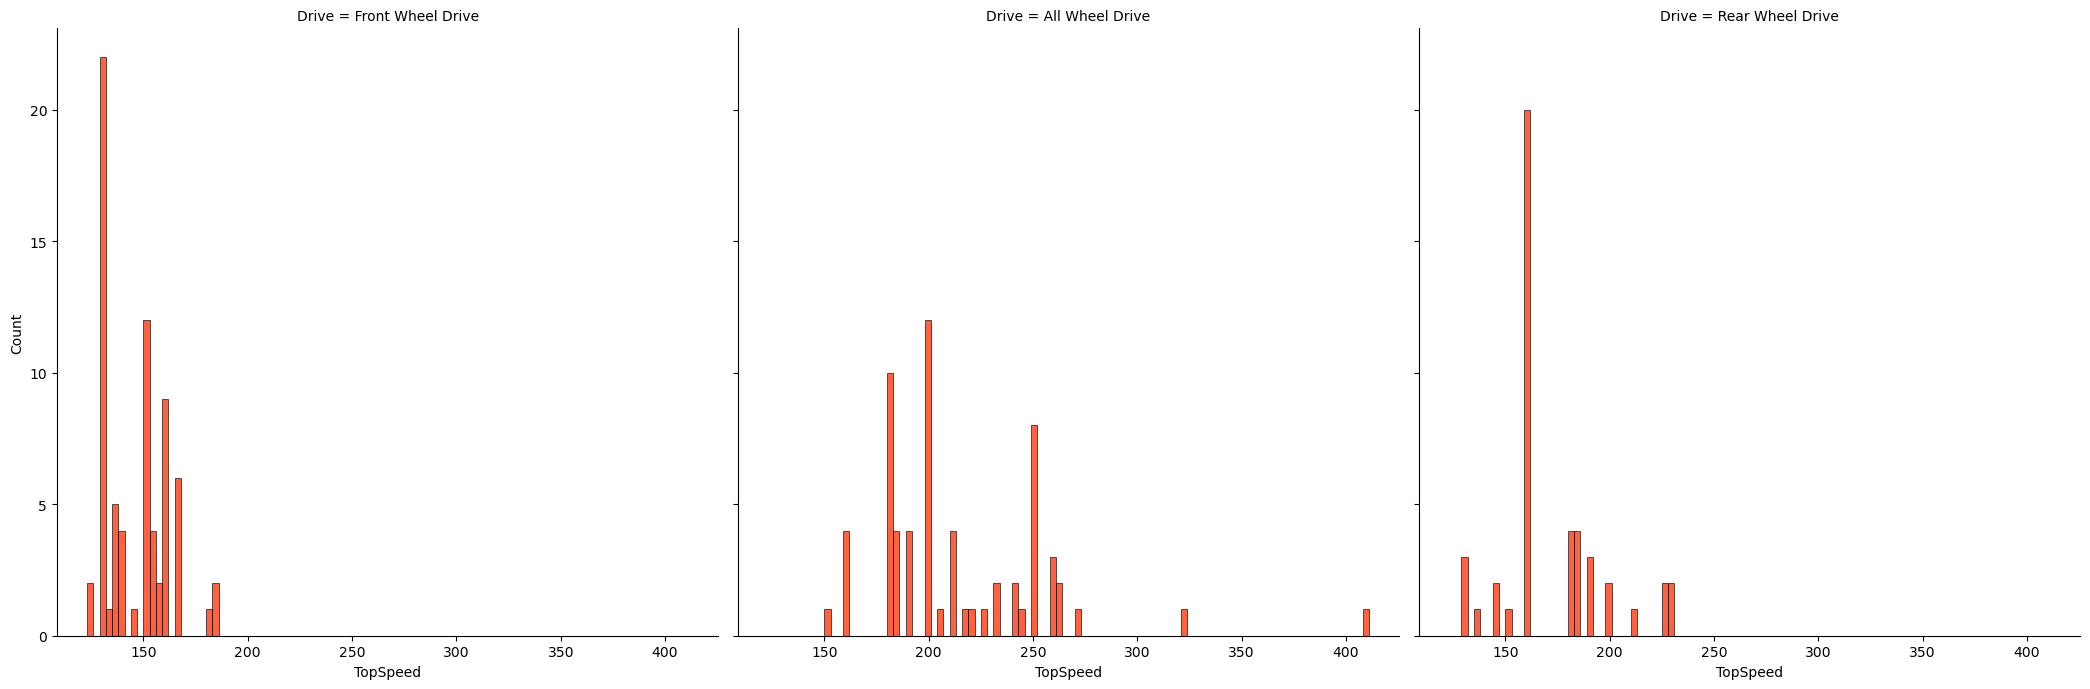

In [348]:
sns.displot(
    df, x="TopSpeed", col="Drive", 
    binwidth=3, height=7, facet_kws=dict(margin_titles=True),
    color="#FF2D00",
)

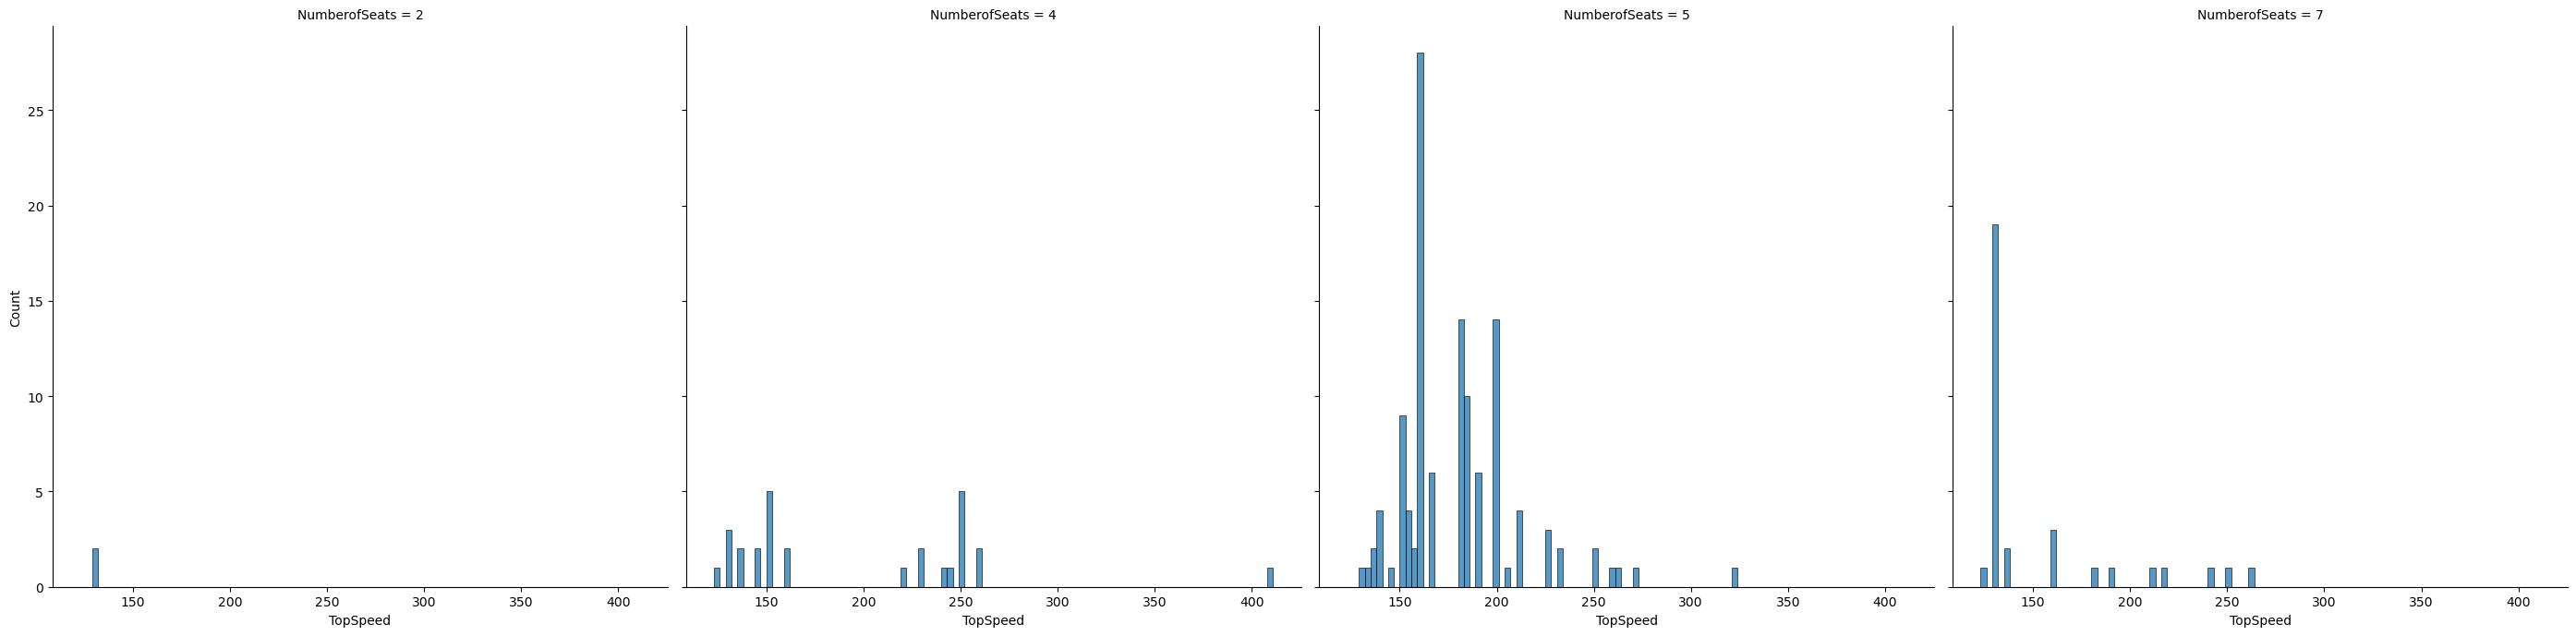

In [335]:
sns.displot(
    df, x="TopSpeed", col="NumberofSeats", 
    binwidth=3, height=7, facet_kws=dict(margin_titles=True),
)

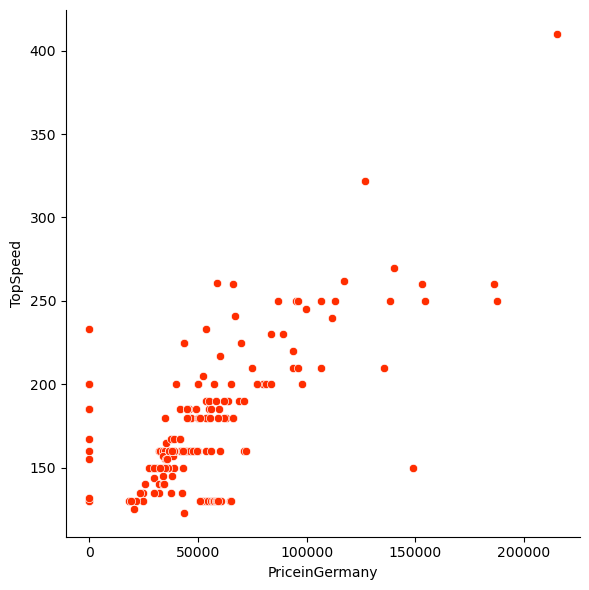

In [347]:
#соотношение между ценой и характеристиками
sns.relplot(x="PriceinGermany", y="TopSpeed", height=6,data=df, color="#FF2D00")

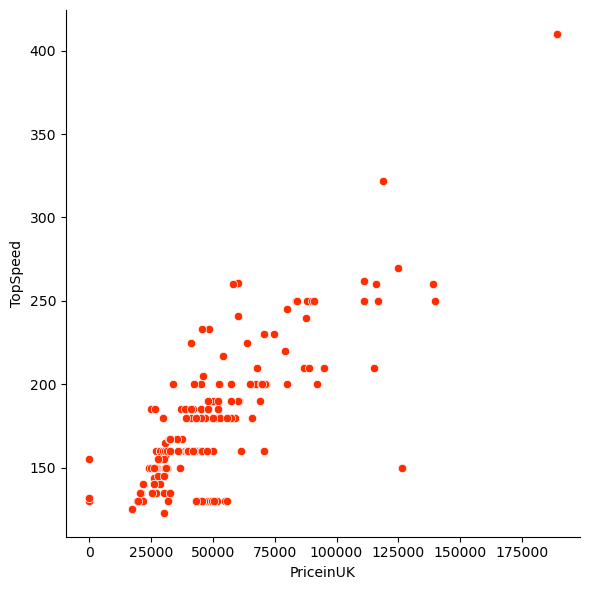

In [346]:
#соотношение между ценой и характеристиками

sns.relplot(x="PriceinUK", y="TopSpeed", height=6,data=df, color="#FF2D00")

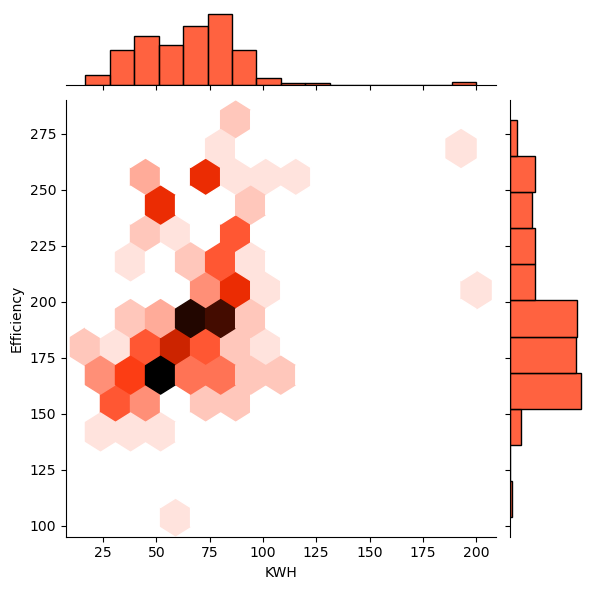

In [338]:
sns.jointplot(x=df["KWH"], y=df["Efficiency"], kind="hex", color="#FF2D00")

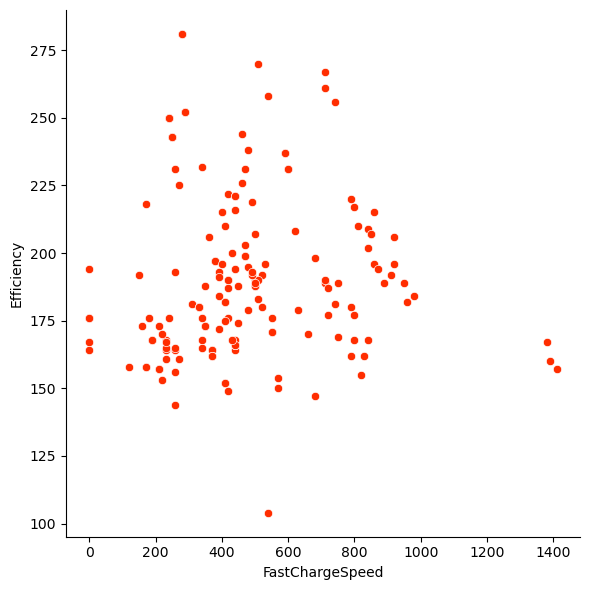

In [342]:
sns.relplot(x="FastChargeSpeed", y="Efficiency", height=6,data=df, color="#FF2D00")

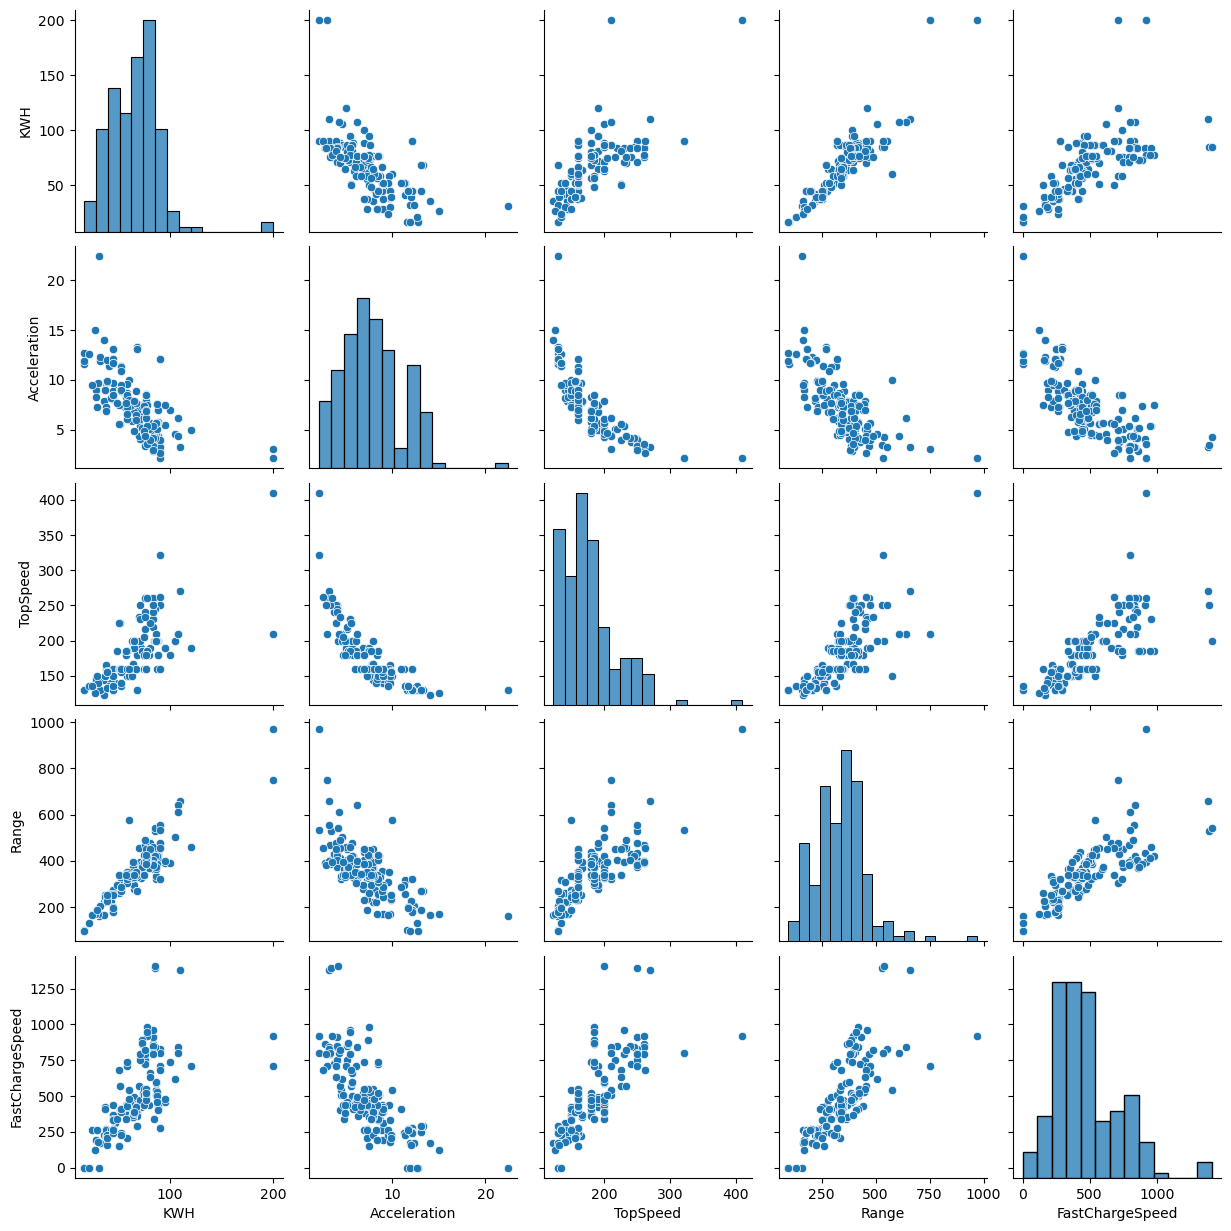

In [345]:
sns.pairplot(df[["KWH","Acceleration","TopSpeed","Range","FastChargeSpeed"]])

In [341]:
# Проверяем первые 5 значений нашего набора данных 
df.head()

,Name,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,36541.5,Opel
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680.0,Renault
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995.0,Nissan
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900.0,Audi
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830.0,Porsche
